<a href="https://colab.research.google.com/github/tgusmao/programacao_ds/blob/master/TrabalhoPratico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Prático de Programação para Ciências de Dados**

Dupla: 
*   Tammy Hikari Yanai Gusmão
*   Thalita Naiara Alves


Trabalho Prático para obtenção de nota na disciplina de Programação para Ciências de Dados - Turma 1 de 2020.

##Importação da Base de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from random import sample

Iniciando abaixo a leitura do arquivo CSV local (localizado no Google Drive)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_original = pd.read_csv('/content/drive/Shared drives/trabalhoPratico_programacaoDS/dados-curso-completo.csv', sep = ',', skiprows = 0, encoding = 'utf-8')

In [ ]:
#cópia da base original
df_copia_original = df_original.copy()

##Resumo do dataset original



A base de dados contém informações sobre tuítes sobre a COVID-19, postados durante o primeiro semestre do ano de 2020. A base foi levemente pré-processada anteriormente pelo professor da disciplina.  

In [ ]:
qntd_linhas = df_original.shape[0]
qntd_colunas = df_original.shape[1]
print('Quantidade de linhas: ', qntd_linhas)
print('Quantidade de colunas: ', qntd_colunas)

Quantidade de linhas:  1658825
Quantidade de colunas:  13


Como pode ser visto acima, o atributo *shape* retornou uma tupla contendo a quantidade de linhas e colunas que constituem a base: 1.658.825 linhas e 13 colunas. 

Abaixo temos a lista dos nomes das colunas existentes:

In [ ]:
for col in df_original.columns:
  print(col)

data
usuario
apelido
texto
retweet
seguidores
idioma
lugar
pais
sigla
latitude
longitude
hashtags


Como pode ser observado abaixo, os tipos de variáveis que consistem o dataframe são *object*, *int64* e *float64*. As colunas com tipo *object* são aquelas com dados textuais. As colunas com tipo *int64* são as que contém dados quantitativos. As de tipo *float64* contém dados de números quebrados. 

In [ ]:
df_original.dtypes

data           object
usuario        object
apelido        object
texto          object
retweet         int64
seguidores      int64
idioma         object
lugar          object
pais           object
sigla          object
latitude      float64
longitude     float64
hashtags       object
dtype: object

In [ ]:
df_original.isnull().sum()

data                0
usuario            57
apelido             0
texto               0
retweet             0
seguidores          0
idioma              0
lugar         1584220
pais          1584225
sigla         1584230
latitude      1650105
longitude     1650105
hashtags            0
dtype: int64

Levando em consideração o achado acima, faz-se necessário o preenchimento apropriado para eliminar os espaços vazios presentes no dataset. Esta atividade é realizada na seção seguinte (Tratamento de Dados).

Para uma perspectiva visual da característica quantitativa dos atributos, foram plotados os gráficos a seguir:


In [4]:
#Arrays com as quantidades de células não nulas e nulas, respectivamente, 
#de cada coluna que apresenta valores nulos
qntd_naonulos = [df_original.usuario.notnull().sum(),df_original.sigla.notnull().sum(),df_original.lugar.notnull().sum(),
           df_original.pais.notnull().sum(), df_original.latitude.notnull().sum(), 
           df_original.longitude.notnull().sum()]

qntd_nulos = [df_original.usuario.isnull().sum(), df_original.sigla.isnull().sum(), df_original.lugar.isnull().sum(),
                 df_original.pais.isnull().sum(), df_original.latitude.isnull().sum(), 
                 df_original.longitude.isnull().sum()]

#Array com labels para os gráficos a seguir
labels_valores_ausentes = ['Usuário', 'Sigla', 'Lugar', 'País', 'Latitude', 'Longitude']

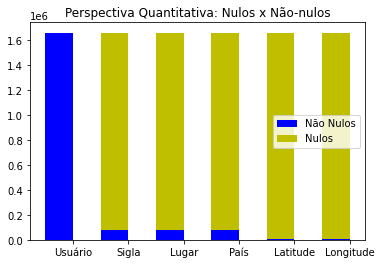

In [63]:
# Range com a quantidade de itens das barras
x_pos = np.arange(len(qntd_naonulos))

first_bar = plt.bar(x_pos, qntd_naonulos, 0.5, color='b')
second_bar = plt.bar(x_pos, qntd_nulos, 0.5, color='y', bottom=qntd_naonulos)

# Definir posição e labels no eixo X
plt.xticks(x_pos+0.25, (labels_valores_ausentes))

plt.title("Perspectiva Quantitativa: Nulos x Não-nulos")
plt.savefig('qntd_nulos_naoNulos_barchar.png')
plt.legend(['Não Nulos', 'Nulos'],loc=5)
plt.show()

No que diz respeito à coluna *usuario*, sabe-se que existem 57 linhas que possuem valores. Por conta da grande quantidade de casos existentes (acima de 1 milhão), não é possível ver a barra inferior que contabiliza o total de nulos da coluna. 

Ademais, nota-se que: as quantidades para *sigla*, *lugar* e '*pais* são semelhantes; e que a base de casos possui pouquíssimas lacunas preenchidas com valores de latitude e longitude. 

Abaixo podemos observar a quantidade em porcentagem para as colunas que apresentam valores nulos. 

In [5]:
#Gerador de cores aleatórias para os gráficos.
todas_as_cores = [k for k,v in pltc.cnames.items()]
fracs = np.array([600, 179, 154, 139, 126, 1185])

def gerar_cores_aleatorias():
  return sample(todas_as_cores, len(fracs))

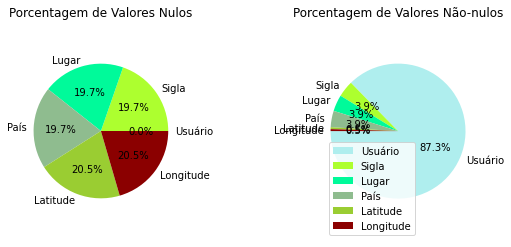

In [32]:
# Criação da figure com uma linha e duas colunas. Figsize define o tamanho da figure
fig, eixos = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

cores_aleatorias = gerar_cores_aleatorias()

# Cria o gráfico de pizza na primeira posição com as configurações definidas
pie_1 = eixos[0].pie(qntd_nulos, labels=labels_valores_ausentes,
                    autopct='%1.1f%%', colors=cores_aleatorias)

# Define o título deste gráfico
eixos[0].set_title('Porcentagem de Valores Nulos')
# Deixa os dois eixos iguais, fazendo com que o gráfico mantenha-se redondo
eixos[0].axis('equal')

# Idem a acima, para o segundo gráfico de pizza
pie_2 = eixos[1].pie(qntd_naonulos, labels=labels_valores_ausentes,
                    autopct='%1.1f%%', startangle=180, colors=cores_aleatorias)
eixos[1].set_title('Porcentagem de Valores Não-nulos')
plt.axis('equal')

# Ajusta o espaço entre os dois gráficos
plt.subplots_adjust(wspace=1)
plt.savefig('qntd_nulos_naoNulos_piechar.png')
plt.legend(loc='lower left')
plt.show()

*idioma*, *sigla*, *pais* e *lugar* são atributos categróricos, isto é, caracterizam o tweet e/ou o usuário que postou o tweet. Como não houve restrição na coleta dedados quanto a localização e idioma, o dataset possui tweets do mundo todo como pode ser observado nas estatísticas abaixo, que apresentam os dez primeiros itens com maiores ocorrências:

In [72]:
#Aquisição de lista de siglas dos idiomas e a quantidade de suas ocorrências
l_idiomas = df_original['idioma'].value_counts().to_frame()
l_idiomas = l_idiomas.rename(columns = {'idioma':'qntd_idioma'})
l_idiomas['porcentagem'] = round(((l_idiomas['qntd_idioma'] * 100)/df_original.shape[0]), 2)
l_idiomas['sigla_idioma'] = l_idiomas.index
l_idiomas.reset_index(drop=True, inplace=True)
l_idiomas = l_idiomas[['sigla_idioma','qntd_idioma','porcentagem']]

#Aquisição de lista de siglas dos países e a quantidade de suas ocorrências
l_siglas = df_original['sigla'].value_counts().to_frame()
l_siglas = l_siglas.rename(columns = {'sigla':'qntd_sigla'})
l_siglas['porcentagem'] = round(((l_siglas['qntd_sigla'] * 100)/df_original.shape[0]), 2)
l_siglas['sigla'] = l_siglas.index
l_siglas.reset_index(drop=True, inplace=True)
l_siglas = l_siglas[['sigla','qntd_sigla','porcentagem']]

#Aquisição de lista de nomes de países e a quantidade de suas ocorrências
l_paises = df_original['pais'].value_counts().to_frame()
l_paises = l_paises.rename(columns = {'pais':'qntd_pais'})
l_paises['porcentagem'] = round(((l_paises['qntd_pais'] * 100)/df_original.shape[0]), 2)
l_paises['pais'] = l_paises.index
l_paises.reset_index(drop=True, inplace=True)
l_paises = l_paises[['pais','qntd_pais','porcentagem']]

#Aquisição de lista de nomes dos lugares e a quantidade de suas ocorrências
#A lista foi delimitada para os lugares (identificados) com mais postagens
#Casos com valores nulos não foram considerados
l_lugares = df_original['lugar'].value_counts().to_frame()
l_lugares = l_lugares.rename(columns = {'lugar':'qntd_lugar'})
l_lugares['porcentagem'] = round(((l_lugares['qntd_lugar'] * 100)/df_original.shape[0]), 2)
l_lugares['lugar'] = l_lugares.index
l_lugares.reset_index(drop=True, inplace=True)
l_lugares = l_lugares[['lugar','qntd_lugar','porcentagem']]

In [80]:
print("Quantidade de siglas idiomáticas únicas: ", len(l_idiomas),".\n")
print('TOP 10 de idiomas únicos presentes no dataset:\n')
l_idiomas.head(10)

Quantidade de siglas idiomáticas únicas:  59 .

TOP 10 de idiomas únicos presentes no dataset:



,sigla_idioma,qntd_idioma,porcentagem
0,pt,1586796,95.66
1,en,23991,1.45
2,es,14255,0.86
3,it,6480,0.39
4,und,5656,0.34
5,ar,4579,0.28
6,fr,3656,0.22
7,ca,2600,0.16
8,tr,2296,0.14
9,ja,1955,0.12


In [85]:
print("Quantidade de países únicas: ", len(l_paises),".\n")
print('TOP 10 de países únicos presentes no dataset:\n')
l_paises.head(10)

Quantidade de países únicas:  121 .

TOP 10 de países únicos presentes no dataset:



,pais,qntd_pais,porcentagem
0,Brazil,67247,4.05
1,Portugal,2675,0.16
2,United States,1068,0.06
3,Italy,484,0.03
4,Spain,379,0.02
5,United Kingdom,323,0.02
6,France,218,0.01
7,Argentina,193,0.01
8,Republic of Mozambique,167,0.01
9,Canada,152,0.01


In [84]:
print("Quantidade de siglas nacionais únicas: ", len(l_siglas),".\n")
print('TOP 10 de siglas (países) únicas presentes no dataset:')
l_siglas.head(10)

Quantidade de siglas nacionais únicas:  120 .

TOP 10 de siglas (países) únicas presentes no dataset:


,sigla,qntd_sigla,porcentagem
0,BR,67247,4.05
1,PT,2675,0.16
2,US,1068,0.06
3,IT,484,0.03
4,ES,379,0.02
5,GB,323,0.02
6,FR,218,0.01
7,AR,193,0.01
8,MZ,167,0.01
9,CA,152,0.01


In [83]:
print("Quantidade de lugares únicos: ", len(l_lugares),".\n")
print('TOP 10 de lugares únicos presentes no dataset:\n')
l_lugares.head(10)

Quantidade de lugares únicos:  4500 .

TOP 10 de lugares únicos presentes no dataset:



,lugar,qntd_lugar,porcentagem
0,Rio de Janeiro,8443,0.51
1,Sao Paulo,7469,0.45
2,Brasília,2822,0.17
3,Porto Alegre,1866,0.11
4,Belo Horizonte,1764,0.11
5,Curitiba,1418,0.09
6,Recife,1361,0.08
7,Fortaleza,1282,0.08
8,Belém,1246,0.08
9,Salvador,1201,0.07


A respeito da relação quantidade de tweets por mês, temos o seguinte gráfico em barras:

In [56]:
df_original['mes'] = pd.DatetimeIndex(df_original['data']).month

In [ ]:
df_tweets_mes = df_original['mes'].value_counts().to_frame()
df_tweets_mes = df_tweets_mes.rename(columns = {'mes':'qntd_mes'})
df_tweets_mes['num_mes'] = df_tweets_mes.index
df_tweets_mes.reset_index(drop=True, inplace=True)
df_tweets_mes = df_tweets_mes.sort_values(by='num_mes')

In [52]:
def defineNomeMes(num_mes):
  if (num_mes == 1):
    return 'Janeiro'
  elif (num_mes == 2):
    return 'Fevereiro'
  elif (num_mes == 3):
    return 'Março'
  elif (num_mes == 4):
    return 'Abril'
  elif (num_mes == 5):
    return 'Maio'
  elif (num_mes == 6):
    return 'Junho'
  elif (num_mes == 7):
    return 'Julho'
  else:
    return 'outro'

In [58]:
df_tweets_mes['nome_mes'] = df_tweets_mes.apply(lambda row: defineNomeMes(row['num_mes']), axis = 'columns')

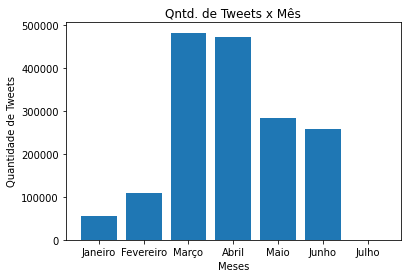

In [62]:
#Quantidade de Tweets x mês

plt.bar(df_tweets_mes.nome_mes, df_tweets_mes.qntd_mes)
plt.title('Qntd. de Tweets x Mês')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Tweets')
plt.savefig('qntd_tweets_por_mes_df_original.png')
plt.show()

No gráfico acima, podemos observar que:

*   Conforme a COVID-19 é espalhada no exterior a quantidade de tweets sobre o assunto aumenta.
*   Chega ao pico no mês de março, onde diversas metrópoles começam a anunciar casos suspeitos e confirmados. 
*   Em abril ainda temos um número alto de postagens. Trata-se do período em que cidades iniciam o período de quarentena e reforçam mensagens do protocolo de distanciamento social e higiene. 
*   Nos meses seguintes (maio e junho), há uma queda de aproximadamente 39,68%. Pode-se supor que a queda se dá pela transferência da menção textual ao vírus para menções audiovisuais (memes e vídeos, por exemplo) e/ou para menções que envolvam os termos #quarentena #fiqueemcasa.




In [ ]:
# Range com a quantidade de itens das barras
#x_pos = np.arange(len(df_original))

first_bar = plt.bar(x_pos, l_idiomas.sigla_idioma, 0.5, color='b')
second_bar = plt.bar(x_pos, l_siglas.sigla_idioma, 0.5, color='y', bottom=l_idiomas.sigla_idioma)

labels_atributos_categoricos = ['Idiomas', 'Siglas']

# Definir posição e labels no eixo X
plt.xticks(x_pos+0.25, (labels_atributos_categoricos))

plt.title("Perspectiva Quantitativa: Nulos x Não-nulos")
plt.savefig('qntd__barchar.png')
plt.show()

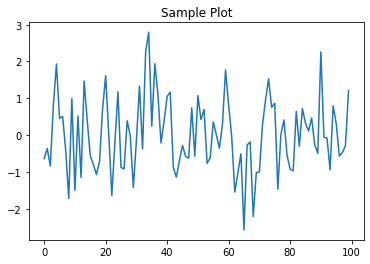

In [ ]:
y = np.random.randn(100)
x = [x for x in range(len(y))]

plt.plot(x, y,  '-')
plt.fill_between(x, y, 200, where=(y > 195), facecolor = 'g', alpha = 0.6)
plt.title("Sample Plot")
plt.show()

## Tratamento de Dados

De acordo com os achados apresentados anteriormente, as colunas *usuario*, *lugar*, *pais* e *sigla*. Por conta da natureza dos atributos, *latitude* e *longitude* serão mantidos como estão para uma análise posterior.

A seguir, temos o preenchimento de dados aplicados somente nas colunas *usuario*, *lugar*, *pais* e *sigla*. 

In [ ]:
df_original['usuario'] = df_original['usuario'].fillna('')
df_original['lugar'] = df_original['lugar'].fillna('Não Informado')
df_original['pais'] = df_original['pais'].fillna('Não Informado')
df_original['sigla'] = df_original['sigla'].fillna('Não Informado')

Em uma busca manual, foi conferido que existem tweets repetidos. Para tanto, foi aplicada a função de remoção de linhas duplicadas.

In [ ]:
df_reduzida = pd.DataFrame.drop_duplicates(df_original)
print('Foram removidas', qntd_linhas - df_reduzida.shape[0], 'linhas.')
print('Quantidade atual de linhas:', df_reduzida.shape[0], '.')

Foram removidas 2 linhas.
Quantidade atual de linhas: 1658823


A remoção da linhas duplicadas mostra que haviam 3 tweets iguais no dataset. Somente uma delas permaneceu no dataset.

In [ ]:
df_original = df_original.rename(columns = {'Data':'data','Usuario':'nome_perfil', 'Apelido':'username', 'Texto':'tweet', 'Retweet':'qntd_retweet', 'Seguidores':'qntd_seguidores', 'Idioma':'idioma', 'Lugar':'lugar', 'Pais':'pais', 'Sigla':'sigla_pais', 'Latitude':'lat', 'Longitude':'long', 'Hashtags':'hashtags'})

Ainda na busca manual, foi percebido que existem tweets em línguas estrangeiras que com o valor **pt** na coluna idioma. Faz-se necessária a criação de uma outra coluna, **idioma_detectado**, com os reais idiomas do tweet. 

In [ ]:
#criação de uma coluna extra, para armazenar o idioma correto dos tweets
df_original['idioma_detectado'] = ''

In [ ]:
df_reduzida.loc[72994]

data                                        2020-06-30 13:00:02
usuario                                            UERJ Oficial
apelido                                            UERJ_oficial
texto         A cartilha Relações Interpessoais e Isolamento...
retweet                                                       6
seguidores                                                24075
idioma                                                       pt
lugar                                                       NaN
pais                                                        NaN
sigla                                                       NaN
latitude                                                    NaN
longitude                                                   NaN
hashtags                                                     []
Name: 72994, dtype: object

##Classificação de Temas